## Support Vector Machines 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df_colon = pd.read_csv('../data/colon.csv')

X = df_colon.drop('Class', axis=1)
y = df_colon['Class']

assert X.shape == (62, 2000)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

In [3]:
confusion = confusion_matrix(y_test,y_pred)
print(confusion)
print(classification_report(y_test,y_pred))

target_names = ['Cancer', 'Healthy']
print(classification_report(y_test, y_pred, target_names = target_names))

[[8 3]
 [1 1]]
              precision    recall  f1-score   support

          -1       0.89      0.73      0.80        11
           1       0.25      0.50      0.33         2

    accuracy                           0.69        13
   macro avg       0.57      0.61      0.57        13
weighted avg       0.79      0.69      0.73        13

              precision    recall  f1-score   support

      Cancer       0.89      0.73      0.80        11
     Healthy       0.25      0.50      0.33         2

    accuracy                           0.69        13
   macro avg       0.57      0.61      0.57        13
weighted avg       0.79      0.69      0.73        13



### Kernel-trick with <code>scikit-learn</code>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import warnings 
warnings.filterwarnings('ignore')

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
irisdata = pd.read_csv(url, names = colnames)

X = irisdata.drop('Class', axis=1)
y = irisdata['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]

scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    clf = GridSearchCV(SVC(C=1), tuned_parameters, cv = 10,
    scoring='%s_macro' % score)
    clf.fit(X_train, y_train)


print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds  = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std* 2, params))
    print()

# Tuning hyper-parameters for precision

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'C': 100, 'kernel': 'linear'}

Grid scores on development set:

0.333 (+/-0.000) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}

0.667 (+/-0.000) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}

0.667 (+/-0.000) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}

0.333 (+/-0.000) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}

0.958 (+/

In [5]:
svclassifier = SVC(kernel = 'rbf', C = 25, degree = 7, gamma = 0.01)
svclassifier.fit(X_train, y_train)

y_pred = svclassifier.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 6  0  0]
 [ 0 13  0]
 [ 0  1 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.98      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



## SVM with Hard Margin

In [112]:
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

df_colon = pd.read_csv('../data/colon.csv')

X = df_colon.drop('Class', axis=1)
y = df_colon['Class']
assert X.shape == (62, 2000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

m,n = X.shape
y = y.to_numpy().reshape(-1,1) * 1.
X_dash = y * X
H = np.dot(X_dash , X_dash.T) * 1.

#Converting into cvxopt format
P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(-np.eye(m))
h = cvxopt_matrix(np.zeros(m))
A = cvxopt_matrix(y.reshape(1, -1))
b = cvxopt_matrix(np.zeros(1))

#Setting solver parameters (change default to decrease tolerance) 
cvxopt_solvers.options['show_progress'] = False
cvxopt_solvers.options['abstol'] = 1e-10
cvxopt_solvers.options['reltol'] = 1e-10
cvxopt_solvers.options['feastol'] = 1e-10

#Run solver
sol = cvxopt_solvers.qp(P, q, G, h, A, b)
alphas = np.array(sol['x'])

In [113]:
#w parameter in vectorized form
w = ((y * alphas).T @ X.to_numpy()).reshape(-1,1)

#Selecting the set of indices S corresponding to non zero parameters
S = (alphas > 1e-4).flatten()

#Computing b
b = y[S] - np.dot(X[S], w)

#Display results
print('Alphas = ', alphas[alphas > 1e-4])
print('w = ', w.flatten())
print('b = ', b[0])

Alphas =  [0.00144346 0.00460682 0.00066177 0.00202853 0.00343005 0.00101425
 0.00323673 0.0015483  0.00354578 0.00290193 0.00371118 0.00281004
 0.0042194  0.00418364 0.00684896 0.00399155 0.00860468 0.00390808
 0.00319156 0.00410369 0.0019162  0.00134921 0.00491714 0.01126432
 0.00136064 0.00984111 0.0004934  0.00117244 0.00305769 0.00418232
 0.00168339 0.0091686  0.00326189 0.0001915  0.00143949]
w =  [ 0.00200061 -0.00132887 -0.00363671 ... -0.01154151 -0.01288506
 -0.01602337]
b =  [0.05749543]


## SVM with non-linearly separable data 

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc

mu = [[20,20], [16,16], [24,24]]
sigma_increase = [[10,9],[9,10]]
sigma_decrease = [[10,-9],[-9,10]]

num_of_clusters = 3
i = 0
c1 = np.random.multivariate_normal(mu[0], sigma_increase, 200)
c2 = np.random.multivariate_normal(mu[1], sigma_decrease, 200)
c3 = np.random.multivariate_normal(mu[2], sigma_decrease, 200)

X = np.append(c1,c2, axis = 0)
X = np.append(X,c3, axis = 0)

y1 = np.repeat(1,200)
y2 = np.repeat(2,200)

In [115]:
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
X = np.concatenate([c1,c3],axis=0)
y = np.concatenate([y1,y2],axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

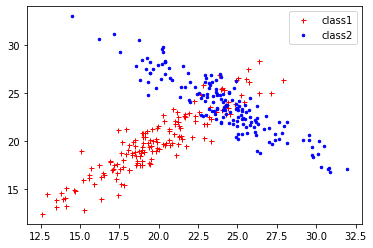

In [116]:
def plotData(X, y):
    """Plots the data points X and y into a new figure """
    
    y = y.flatten()
    class1 = y==1
    class2 = y==2
    plt.figure(figsize=(6,4))    
    plt.plot(X[:,0][class1], X[:,1][class1], "r+", markersize=5, label='class1')
    plt.plot(X[:,0][class2], X[:,1][class2], "b.", markersize=5, label='class2')
    plt.legend()
    # shorter but not as clear
    # plt.plot(X[:,0][pos], X[:,1][pos], 'k+', X[:,0][neg], X[:,1][neg], 'yo', markersize=15)  

plotData(X_train, y_train)

In [118]:
def svmTrainLinear(X, y, C, kernelFunction, tol=1e-3, max_passes=-1, sigma=0.1):
    y = y.flatten()
    clf = svm.SVC(C = C, kernel=kernelFunction, tol=tol, max_iter=max_passes, verbose=2)
    return clf.fit(X, y)       

    
def visualizeBoundaryLinear(X, y, model):
    plotData(X, y) 
    w = model.coef_[0]
    b = model.intercept_[0]
    xp = np.linspace(X[:,0].min(), X[:,0].max(), 100)
    yp = - (w[0] * xp + b) / w[1]
    plt.plot(xp, yp, 'b-')   
    plt.show()

[LibSVM]

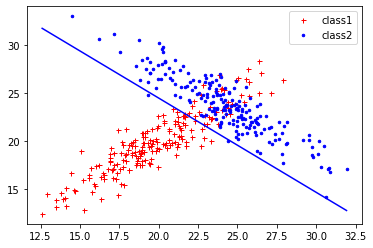

In [119]:
C = 0.1
linear_model = svmTrainLinear(X_train, y_train, C, "linear")
visualizeBoundaryLinear(X, y, linear_model)

<Figure size 720x576 with 0 Axes>

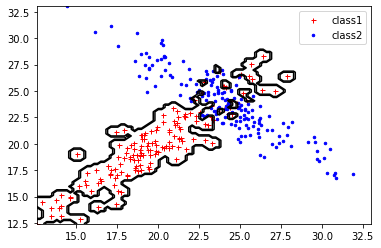

In [120]:
def visualizeBoundaryNonLinear(X, y, model):
    plt.figure(figsize=(10,8))
    plotData(X, y)
    X_21,X_22 = np.meshgrid(np.linspace(X[:,0].min(),X[:,1].max(),num=100),np.linspace(X[:,1].min(),X[:,1].max(),num=100))
    plt.contour(X_21,X_22,rbk_model.predict(np.array([X_21.ravel(),X_22.ravel()]).T).reshape(X_21.shape),1,colors="k")
    plt.legend()
    plt.show()
    
rbk_model = SVC(kernel = "rbf", gamma = 10, C = 10)
rbk_model.fit(X_train,y_train.ravel())
visualizeBoundaryNonLinear(X_train, y_train, rbk_model)

## SVM with Soft Margin

In [126]:
# #Initializing values and computing H. Note the 1. to force to float type

# df_colon = pd.read_csv('../data/colon.csv')

# X = df_colon.drop('Class', axis=1)
# y = df_colon['Class']

# assert X.shape == (62, 2000)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# C = 10
# m,n = X.shape
# # y = y.to.reshape(-1,1) * 1.
# X_dash = y * X
# H = np.dot(X_dash , X_dash.T) * 1.

# #Converting into cvxopt format - as previously
# P = cvxopt_matrix(H)
# q = cvxopt_matrix(-np.ones((m, 1)))
# G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
# h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
# A = cvxopt_matrix(y.reshape(1, -1))
# b = cvxopt_matrix(np.zeros(1))

# #Run solver
# sol = cvxopt_solvers.qp(P, q, G, h, A, b)
# alphas = np.array(sol['x'])

# #==================Computing and printing parameters===============================#
# w = ((y * alphas).T @ X.to_numpy()).reshape(-1,1)
# S = (alphas > 1e-4).flatten()
# b = y[S] - np.dot(X[S], w)

# #Display results
# print('X: ', X)
# print('Alphas: ', alphas)
# print('Alphas = ',alphas[alphas > 1e-4])
# print('w = ', w.flatten())
# print('b = ', b[0])

(2.7914999999999996,
 array([[47.46903428],
        [47.46903429],
        [47.46903427],
        [47.46903428],
        [47.46903429],
        [47.46903428],
        [47.46903429],
        [47.46903428],
        [47.46903429],
        [47.46903428],
        [47.46903429],
        [47.46903428],
        [47.46903429],
        [47.46903429],
        [47.46903429],
        [47.46903429],
        [47.46903429],
        [47.46903429],
        [47.46903429],
        [47.46903429],
        [47.4690343 ],
        [47.4690343 ],
        [47.46903429],
        [47.46903429],
        [47.4690343 ],
        [47.46903429],
        [47.46903432],
        [47.4690343 ],
        [47.46903429],
        [47.46903429],
        [47.4690343 ],
        [47.46903429],
        [47.46903429],
        [47.46903438],
        [47.4690343 ]]))

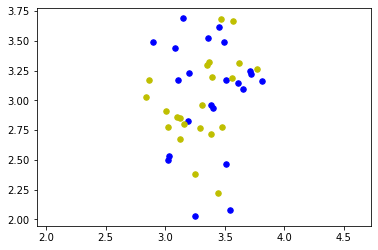

In [29]:
# Xm = X.to_numpy()
class0 = df_colon[df_colon['Class'] == -1]
class0 = class0.drop('Class', axis = 1)
class0 = class0.to_numpy()

class1 = df_colon[df_colon['Class'] == 1]
class1 = class1.drop('Class', axis = 1)
class1 = class1.to_numpy()

def get_axes():
    axes = plt.axes()
    plot0 = plt.scatter(np.array(class0[:22,0]), np.array(class0[:22,1]), s = 30, c='b', marker='o', label='Class 0')
    plot1 = plt.scatter(np.array(class1[:22,0]), np.array(class1[:22,1]), s = 30, c='y', marker='o', label='Class 1')
    axes.set_aspect('equal', 'datalim')
    return axes

def plot_w(w, b, axes):
    ylim = axes.get_ylim()
    xlim = axes.get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')


def plot_w(w, b, axes):
    ylim = axes.get_ylim()
    xlim = axes.get_xlim()
    p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
    p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
    print(p1)
    plt.plot((p1[0],p2[0]), (p1[1],p2[1]), 'r-')

axes = get_axes()
# plot_w(w, b, axes)
xlim = axes.get_xlim()
p1 = (xlim[0], - (w[0,0] * xlim[0] + b) / w[1,0])
p2 = (xlim[1], - (w[0,0] * xlim[1] + b) / w[1,0])
# plt.plot((p1[0],p2[0]), (p1[1][1],p2[1][1]), 'r-')

Accuracy: 1.0


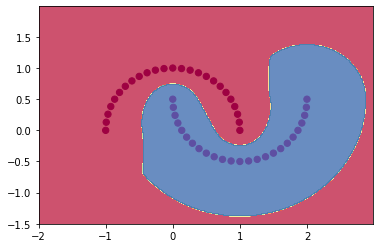

In [95]:
import cvxopt
from sklearn import datasets

def linear(x, z):
    return np.dot(x, z.T)

def polynomial(x, z, p=5):
    return (1 + np.dot(x, z.T)) ** p

def gaussian(x, z, sigma=0.1):
    return np.exp(-np.linalg.norm(x - z, axis=1) ** 2 / (2 * (sigma ** 2)))

def plot_contour(X, y, svm):
    # plot the resulting classifier
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    points = np.c_[xx.ravel(), yy.ravel()]

    Z = svm.predict(points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)

    # plt the points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)


class SVM:
    def __init__(self, kernel=gaussian, C=1):
        self.kernel = kernel
        self.C = C

    def fit(self, X, y):
        self.y = y
        self.X = X
        m, n = X.shape

        # Calculate Kernel
        self.K = np.zeros((m, m))
        for i in range(m):
            self.K[i, :] = self.kernel(X[i, np.newaxis], self.X)

        # Solve with cvxopt final QP needs to be reformulated
        # to match the input form for cvxopt.solvers.qp
        P = cvxopt.matrix(np.outer(y, y) * self.K)
        q = cvxopt.matrix(-np.ones((m, 1)))
        G = cvxopt.matrix(np.vstack((np.eye(m) * -1, np.eye(m))))
        h = cvxopt.matrix(np.hstack((np.zeros(m), np.ones(m) * self.C)))
        A = cvxopt.matrix(y, (1, m), "d")
        b = cvxopt.matrix(np.zeros(1))
        cvxopt.solvers.options["show_progress"] = False
        sol = cvxopt.solvers.qp(P, q, G, h, A, b)
        self.alphas = np.array(sol["x"])

    def predict(self, X):  #<----this is X_test
        y_predict = np.zeros((X.shape[0]))
        sv = self.get_parameters(self.alphas)

        for i in range(X.shape[0]):
            y_predict[i] = np.sum(
                self.alphas[sv]
                * self.y[sv, np.newaxis]
                * self.kernel(X[i], self.X[sv])[:, np.newaxis]
            )

        return np.sign(y_predict + self.b)

    def get_parameters(self, alphas):
        threshold = 1e-5

        sv = ((alphas > threshold) * (alphas < self.C)).flatten()
        self.w = np.dot(self.X[sv].T, alphas[sv] * self.y[sv, np.newaxis])
        self.b = np.mean(
            self.y[sv, np.newaxis]
            - self.alphas[sv] * self.y[sv, np.newaxis] * self.K[sv, sv][:, np.newaxis]
        )
        return sv
    
if __name__ == "__main__":
    X, y = datasets.make_moons(50)
    
    #transform our y to be -1 and 1 to meet svm purpose
    y[y==0] = -1
    
    svm = SVM(kernel=gaussian)
    svm.fit(X, y)
    y_pred = svm.predict(X)
    plot_contour(X, y, svm)

    print(f"Accuracy: {sum(y==y_pred)/y.shape[0]}")